In [1]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from imutils import face_utils
import tensorflow as tf
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
img=image.load_img("basedata/Training/Asleep/1.jpg")

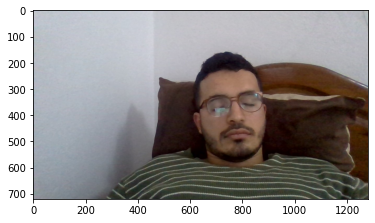

In [3]:
plt.imshow(img)

In [4]:
cv2.imread("basedata/Training/Asleep/1.jpg").shape

(720, 1280, 3)

In [5]:
train = ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [6]:
train_dataset=train.flow_from_directory('basedata/Training/',target_size=(200,200),batch_size=3,class_mode='binary')
validation_dataset=validation.flow_from_directory('basedata/Validation/',target_size=(200,200),batch_size=3,class_mode='binary')


Found 36 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [7]:
train_dataset.class_indices

{'Asleep': 0, 'Awake': 1}

In [8]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPool2D(2,2),   
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(512,activation='relu'),
                                 tf.keras.layers.Dense(1,activation='sigmoid')
                                 ])

In [10]:
model.compile(loss='binary_crossentropy',
             optimizer = RMSprop(learning_rate=0.001),
              metrics =['accuracy'])

In [17]:
model_fit=model.fit(train_dataset,steps_per_epoch=6,epochs=30 ,validation_data=validation_dataset)

Epoch 1/30
6/6 [==============================] - 2s 317ms/step - loss: 2.2123e-06 - accuracy: 1.0000
Epoch 2/30
6/6 [==============================] - 2s 311ms/step - loss: 9.0244e-07 - accuracy: 1.0000
Epoch 3/30
6/6 [==============================] - 2s 306ms/step - loss: 4.7845e-07 - accuracy: 1.0000
Epoch 4/30
6/6 [==============================] - 2s 306ms/step - loss: 9.2444e-07 - accuracy: 1.0000
Epoch 5/30
6/6 [==============================] - 2s 330ms/step - loss: 9.2201e-08 - accuracy: 1.0000
Epoch 6/30
6/6 [==============================] - 2s 303ms/step - loss: 6.2812e-07 - accuracy: 1.0000
Epoch 7/30
6/6 [==============================] - 2s 282ms/step - loss: 1.8892e-07 - accuracy: 1.0000
Epoch 8/30
6/6 [==============================] - 2s 281ms/step - loss: 4.0860e-07 - accuracy: 1.0000
Epoch 9/30
6/6 [==============================] - 2s 285ms/step - loss: 1.1437e-04 - accuracy: 1.0000
Epoch 10/30
6/6 [==============================] - 2s 280ms/step - loss: 1.1639 - 

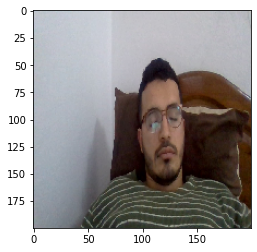

you are asleep


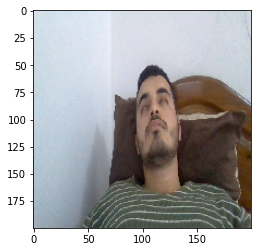

you are asleep


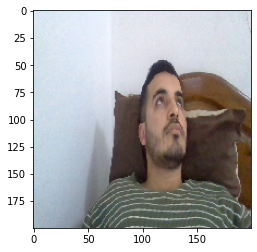

you are asleep


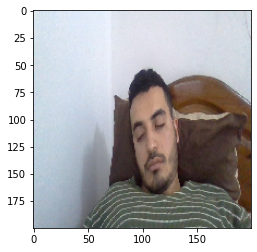

you are asleep


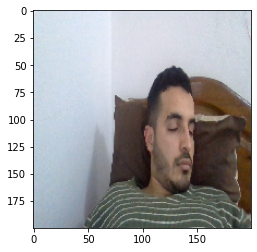

you are asleep


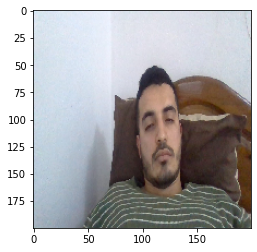

you are asleep


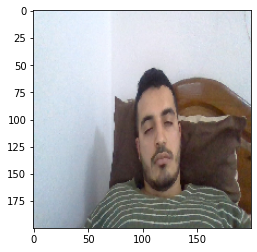

you are asleep


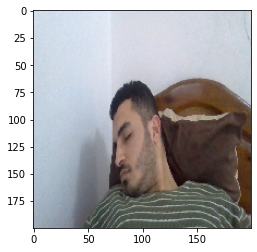

you are asleep


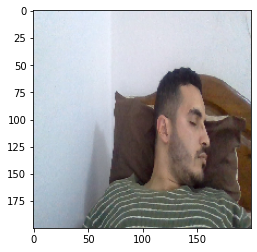

you are asleep


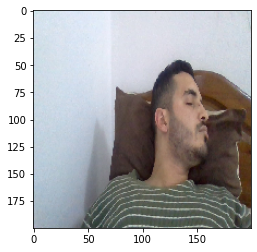

you are asleep


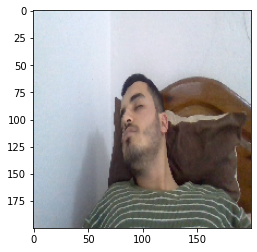

you are asleep


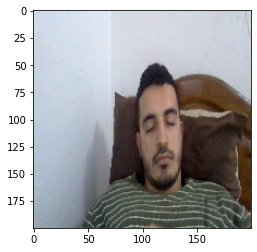

you are asleep


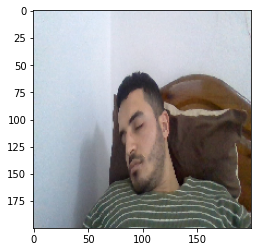

you are asleep


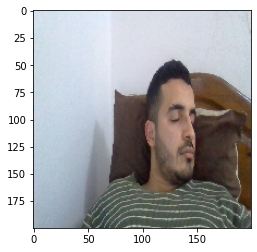

you are asleep


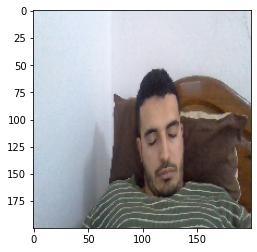

you are asleep


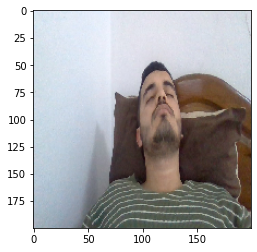

you are asleep


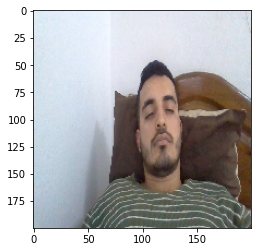

you are asleep


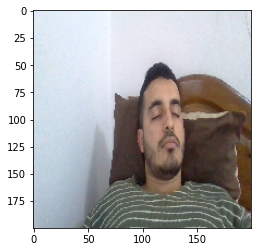

you are asleep


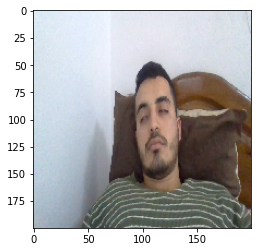

you are asleep


In [19]:
dir_path='basedata/Testing'
for i in os.listdir(dir_path ):
    
    img=image.load_img(dir_path+'//'+i,target_size=(200,200))

    plt.imshow(img)
    plt.show()
    
    X=image.img_to_array(img)
    X=np.expand_dims(X,axis=0)
    images=np.vstack([X])
    
    val=model.predict(images)
    if val==0:
        print ("you are asleep")
        
    else:
        print("You are awake")
        